Epoch [1/5], Loss: 0.1551
Epoch [2/5], Loss: 0.5222
Epoch [3/5], Loss: 0.1372
Epoch [4/5], Loss: 0.0359
Epoch [5/5], Loss: 0.0833
Test Accuracy: 97.28%


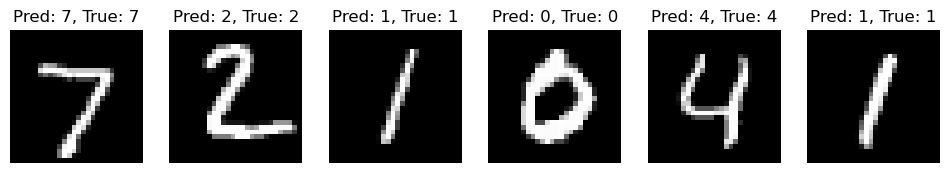

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5,), (0.5,))  # Normalize images to range [-1, 1]
])

# Download and load the training and test datasets
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Step 2: Build a simple feedforward neural network
class FeedforwardNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FeedforwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))  # First layer + ReLU
        x = self.relu(self.fc2(x))  # Second layer + ReLU
        x = self.fc3(x)             # Output layer
        return x

# Model parameters
input_size = 28 * 28  # Flattened MNIST images (28x28 pixels)
hidden_size = 128     # Number of neurons in the hidden layers
output_size = 10      # 10 classes for digits (0-9)

# Initialize the model
model = FeedforwardNN(input_size, hidden_size, output_size)

# Step 3: Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Step 4: Train the model
num_epochs = 5
for epoch in range(num_epochs):
    for images, labels in train_loader:
        # Flatten the images (batch_size, 1, 28, 28) -> (batch_size, 784)
        images = images.view(-1, 28 * 28)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Step 5: Evaluate the model
model.eval()  # Set model to evaluation mode
with torch.no_grad():  # Disable gradient calculation for faster evaluation
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.view(-1, 28 * 28)  # Flatten images
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Test Accuracy: {100 * correct / total:.2f}%')

# Step 6: Visualize some predictions
# Get a batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Get predictions
images_flat = images.view(-1, 28 * 28)
outputs = model(images_flat)
_, preds = torch.max(outputs, 1)

# Plot the images along with predicted and true labels
fig, axes = plt.subplots(1, 6, figsize=(12, 4))
for i in range(6):
    ax = axes[i]
    ax.imshow(images[i].numpy().squeeze(), cmap='gray')
    ax.set_title(f'Pred: {preds[i].item()}, True: {labels[i].item()}')
    ax.axis('off')
plt.show()